In [21]:
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].is_upper

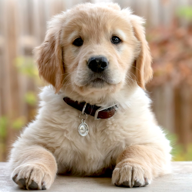

In [22]:
test_image = PILImage.create("dog.jpg")
test_image.thumbnail((192, 192))
test_image

In [23]:
learn = load_learner("model.pkl")

In [24]:
learn.predict(test_image)

('False', tensor(0), tensor([9.9982e-01, 1.7829e-04]))

In [25]:
categories = ("Dog", "Cat")

def classify_image(img):
    _,_,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [26]:
classify_image(test_image)

{'Dog': 0.9998217225074768, 'Cat': 0.00017828676209319383}

In [27]:
image = gr.Image(height=192, width=192)
label = gr.Label()
examples = ["dog.jpg", "cat.jpg"]

gradio_interface = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
gradio_interface.launch(inline=False)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
